<a href="https://colab.research.google.com/github/vikastrivedi0/comp313-002-Team-5-F23/blob/Vikas/CostcoStockPredictionLSTM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from matplotlib import mdates

url = "https://raw.githubusercontent.com/vikastrivedi0/StockPricePrediction-Costco-LSTM/main/Costco-Stock-Prices-Datset.csv"

df = pd.read_csv(url)

df.head()

,Date,Time,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits
0,2000-01-03,00:00:00-05:00,31.512873,31.512873,30.431443,30.799129,6057400,costco,COST,retail,usa,0.0,0
1,2000-01-04,00:00:00-05:00,30.777503,30.842389,29.047215,29.112101,5722800,costco,COST,retail,usa,0.0,0
2,2000-01-05,00:00:00-05:00,29.220253,29.717711,28.960709,29.609568,7726400,costco,COST,retail,usa,0.0,0
3,2000-01-06,00:00:00-05:00,29.977260,30.842405,29.934003,30.204361,7221400,costco,COST,retail,usa,0.0,0
4,2000-01-07,00:00:00-05:00,30.063773,32.269891,30.042144,32.205006,5164800,costco,COST,retail,usa,0.0,0


In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Parse 'Date' column for proper indexing in pandas
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Extract the required columns into a dataset
dataset = df[['Open', 'High', 'Low', 'Close']].values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = len(dataset) - 60
test_size = 60
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])  # Using 'Close' value for prediction
    return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 4))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 4))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(300, input_shape=(look_back, 4)))  # Adjusted for 4 features
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01, ema_momentum=0.9))
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=2)

# Predictions and inversion function
def predict_and_inverse(model, X):
    prediction = model.predict(X)
    prediction = np.column_stack((np.zeros((prediction.shape[0], 3)), prediction))  # Padding with zeros
    return scaler.inverse_transform(prediction)[:, -1]

# Make and invert predictions
trainPredict = predict_and_inverse(model, trainX)
trainY = scaler.inverse_transform(np.column_stack((np.zeros((trainY.shape[0], 3)), trainY)))[:, -1]
testPredict = predict_and_inverse(model, testX)
testY = scaler.inverse_transform(np.column_stack((np.zeros((testY.shape[0], 3)), testY)))[:, -1]

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % trainScore)
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % testScore)



Epoch 1/100
92/92 - 2s - loss: 0.0847 - 2s/epoch - 25ms/step
Epoch 2/100
92/92 - 0s - loss: 1.8085e-04 - 385ms/epoch - 4ms/step
Epoch 3/100
92/92 - 1s - loss: 1.6693e-04 - 502ms/epoch - 5ms/step
Epoch 4/100
92/92 - 1s - loss: 1.6032e-04 - 530ms/epoch - 6ms/step
Epoch 5/100
92/92 - 1s - loss: 1.7331e-04 - 515ms/epoch - 6ms/step
Epoch 6/100
92/92 - 0s - loss: 1.1813e-04 - 496ms/epoch - 5ms/step
Epoch 7/100
92/92 - 0s - loss: 1.1539e-04 - 495ms/epoch - 5ms/step
Epoch 8/100
92/92 - 0s - loss: 1.1049e-04 - 496ms/epoch - 5ms/step
Epoch 9/100
92/92 - 1s - loss: 9.4651e-05 - 511ms/epoch - 6ms/step
Epoch 10/100
92/92 - 0s - loss: 8.7067e-05 - 462ms/epoch - 5ms/step
Epoch 11/100
92/92 - 0s - loss: 1.1471e-04 - 389ms/epoch - 4ms/step
Epoch 12/100
92/92 - 0s - loss: 7.8866e-05 - 378ms/epoch - 4ms/step
Epoch 13/100
92/92 - 0s - loss: 7.3030e-05 - 377ms/epoch - 4ms/step
Epoch 14/100
92/92 - 0s - loss: 7.9671e-05 - 396ms/epoch - 4ms/step
Epoch 15/100
92/92 - 0s - loss: 6.3259e-05 - 418ms/epoch - 5ms/

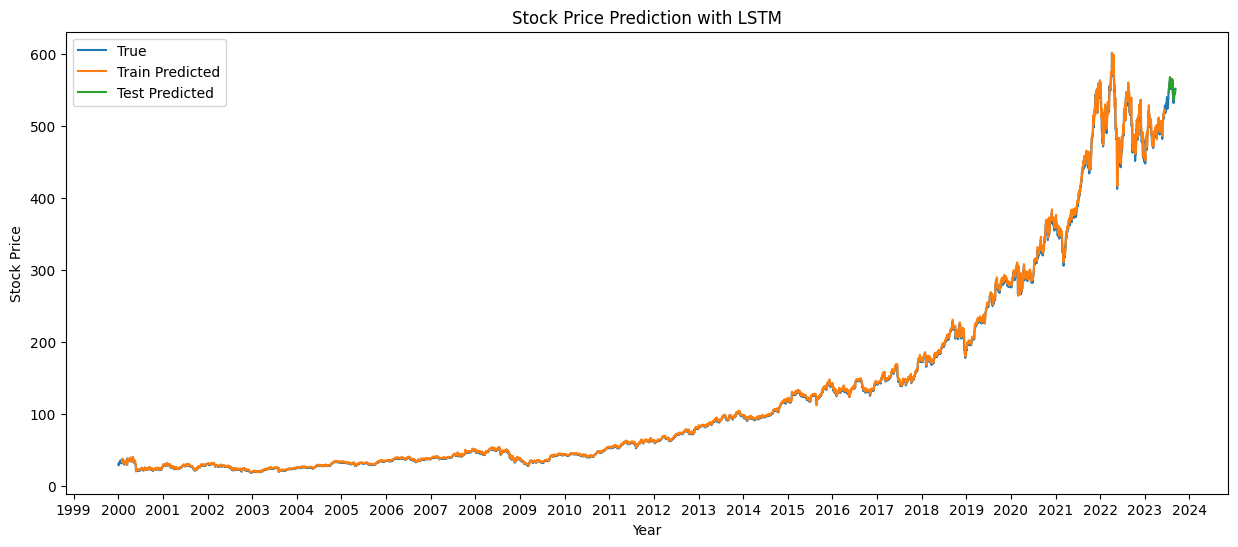

In [24]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset[:, 3])  # Only 'Close' values
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict.flatten()

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset[:, 3])  # Only 'Close' values
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict.flatten()

# Plot baseline and predictions
plt.figure(figsize=(15, 6))

# Inverting the scaled dataset for plotting the baseline 'Close' values
baseline_close = scaler.inverse_transform(dataset)[:, 3]

# Getting the dates for the x-axis
dates = df.index

# Plotting the baseline data
plt.plot(dates, baseline_close, label='True')  # Plotting the 'Close' values

# Plotting the train and test predictions
plt.plot(dates, trainPredictPlot, label='Train Predicted')
plt.plot(dates, testPredictPlot, label='Test Predicted')

# Formatting the x-axis to show years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [35]:

# Predict for next 7 days
last_known_data = dataset[-look_back:]
predictions = []

for _ in range(5):
    prediction = model.predict(last_known_data.reshape(1, look_back, 4))
    predictions.append(prediction[0][0])
    new_data_point = np.array([last_known_data[0, 1], last_known_data[0, 2], last_known_data[0, 3], prediction[0][0]]).reshape(1, 4)
    last_known_data = np.append(last_known_data[1:], new_data_point, axis=0)

next_week_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros(len(predictions)), np.zeros(len(predictions)), np.zeros(len(predictions))])[:,0]
print(next_week_predictions)

for _ in range(10):
    prediction = model.predict(last_known_data.reshape(1, look_back, 4))
    predictions.append(prediction[0][0])
    new_data_point = np.array([last_known_data[0, 1], last_known_data[0, 2], last_known_data[0, 3], prediction[0][0]]).reshape(1, 4)
    last_known_data = np.append(last_known_data[1:], new_data_point, axis=0)

next_week_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros(len(predictions)), np.zeros(len(predictions)), np.zeros(len(predictions))])[:,0]
print(next_week_predictions)

for _ in range(20):
    prediction = model.predict(last_known_data.reshape(1, look_back, 4))
    predictions.append(prediction[0][0])
    new_data_point = np.array([last_known_data[0, 1], last_known_data[0, 2], last_known_data[0, 3], prediction[0][0]]).reshape(1, 4)
    last_known_data = np.append(last_known_data[1:], new_data_point, axis=0)

next_week_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros(len(predictions)), np.zeros(len(predictions)), np.zeros(len(predictions))])[:,0]
print(next_week_predictions)

1/1 [==============================] - 0s 18ms/step
[543.81732852 549.17899254 549.65393709 549.89349032 540.76480229]
1/1 [==============================] - 0s 17ms/step
[543.81732852 549.17899254 549.65393709 549.89349032 540.76480229
 536.02572696 532.30628758 529.13240666 528.55799221 524.66950947
 524.04112877 526.12625117 530.06564807 532.25495722 536.47035885]
1/1 [==============================] - 0s 18ms/step
[543.81732852 549.17899254 549.65393709 549.89349032 540.76480229
 536.02572696 532.30628758 529.13240666 528.55799221 524.66950947
 524.04112877 526.12625117 530.06564807 532.25495722 536.47035885
 536.33336228 536.79089612 536.49692577 538.40235723 540.96069003
 541.34209541 542.1988962  544.43363965 546.18161176 540.65947101
 534.00351894 529.62725906 526.46881194 525.19200396 521.99922099
 520.59817967 521.33289745 524.86917763 527.76309999 531.25914827]


In [39]:
# Import the BDay class to handle business days
from pandas.tseries.offsets import BDay

# Generate future dates starting from the last date in your dataset
last_date = df.index[-1]
future_dates = [last_date + BDay(i) for i in range(1, 21)]

# Combine the predictions with dates
dated_predictions = zip(future_dates, next_week_predictions)

# Print predictions with dates
for date, prediction in dated_predictions:
    print(f"{date.date()}: {prediction:.2f}")

2023-09-11: 543.82
2023-09-12: 549.18
2023-09-13: 549.65
2023-09-14: 549.89
2023-09-15: 540.76
2023-09-18: 536.03
2023-09-19: 532.31
2023-09-20: 529.13
2023-09-21: 528.56
2023-09-22: 524.67
2023-09-25: 524.04
2023-09-26: 526.13
2023-09-27: 530.07
2023-09-28: 532.25
2023-09-29: 536.47
2023-10-02: 536.33
2023-10-03: 536.79
2023-10-04: 536.50
2023-10-05: 538.40
2023-10-06: 540.96


Epoch 1/100
93/93 - 3s - loss: 0.0694 - 3s/epoch - 29ms/step
Epoch 2/100
93/93 - 1s - loss: 1.5442e-04 - 514ms/epoch - 6ms/step
Epoch 3/100
93/93 - 1s - loss: 1.4408e-04 - 506ms/epoch - 5ms/step
Epoch 4/100
93/93 - 0s - loss: 1.1421e-04 - 480ms/epoch - 5ms/step
Epoch 5/100
93/93 - 1s - loss: 1.0321e-04 - 514ms/epoch - 6ms/step
Epoch 6/100
93/93 - 0s - loss: 9.7198e-05 - 472ms/epoch - 5ms/step
Epoch 7/100
93/93 - 0s - loss: 8.9553e-05 - 360ms/epoch - 4ms/step
Epoch 8/100
93/93 - 0s - loss: 1.0324e-04 - 364ms/epoch - 4ms/step
Epoch 9/100
93/93 - 0s - loss: 9.9195e-05 - 364ms/epoch - 4ms/step
Epoch 10/100
93/93 - 0s - loss: 9.1896e-05 - 361ms/epoch - 4ms/step
Epoch 11/100
93/93 - 0s - loss: 8.1781e-05 - 397ms/epoch - 4ms/step
Epoch 12/100
93/93 - 0s - loss: 7.4075e-05 - 369ms/epoch - 4ms/step
Epoch 13/100
93/93 - 0s - loss: 8.4397e-05 - 370ms/epoch - 4ms/step
Epoch 14/100
93/93 - 0s - loss: 7.4850e-05 - 384ms/epoch - 4ms/step
Epoch 15/100
93/93 - 0s - loss: 8.0878e-05 - 385ms/epoch - 4ms/

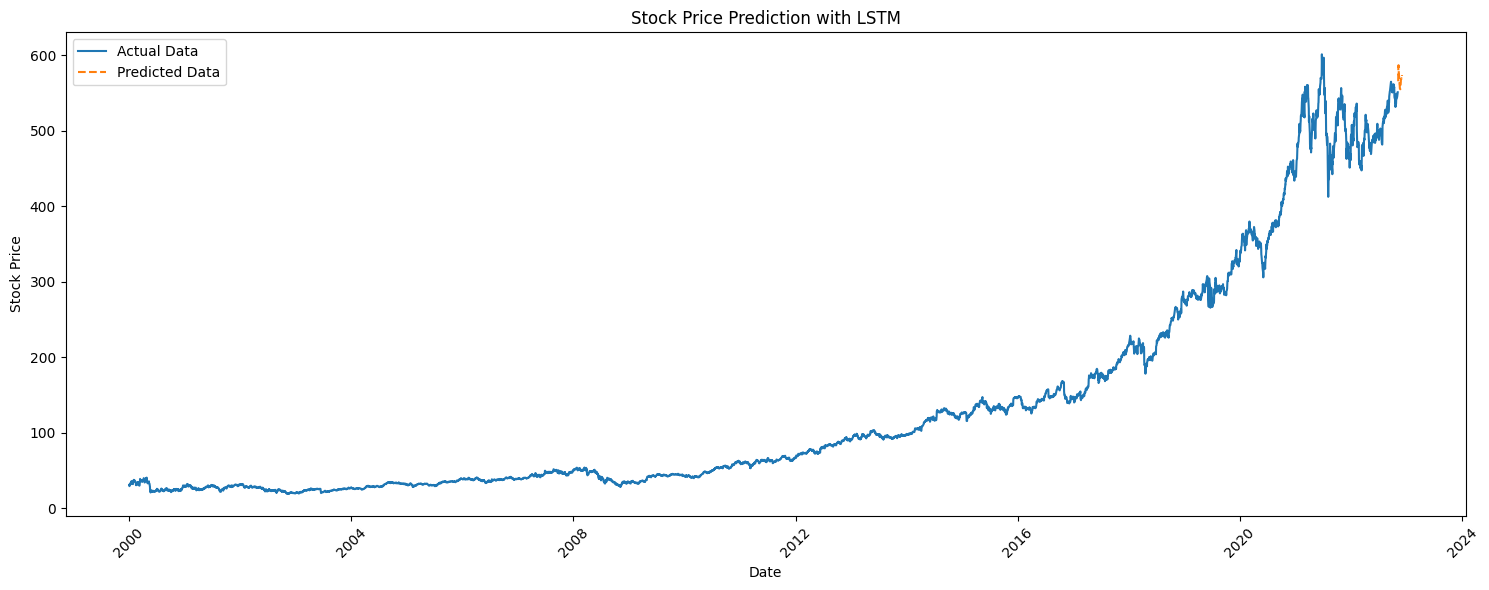

In [42]:
df = pd.read_csv(url)

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

# Assuming df is your DataFrame with stock data
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.set_index('Date', inplace=True)

dataset = df[['Open', 'High', 'Low', 'Close']].values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Function to create dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])
    return np.array(dataX), np.array(dataY)

look_back = 20
dataX, dataY = create_dataset(dataset, look_back)

# Reshape input to be [samples, time steps, features]
dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1], 4))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(300, input_shape=(look_back, 4)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01, ema_momentum=0.9))
model.fit(dataX, dataY, epochs=100, batch_size=64, verbose=2)

# Predict for next 20 days
last_known_data = dataset[-look_back:]
predictions = []

for _ in range(20):
    prediction = model.predict(last_known_data.reshape(1, look_back, 4))
    predictions.append(prediction[0][0])
    new_data_point = np.array([last_known_data[0, 1], last_known_data[0, 2], last_known_data[0, 3], prediction[0][0]]).reshape(1, 4)
    last_known_data = np.append(last_known_data[1:], new_data_point, axis=0)
next_20_days_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros(len(predictions)), np.zeros(len(predictions)), np.zeros(len(predictions))])[:,0]
print(next_20_days_predictions)

# Plotting
plt.figure(figsize=(15, 6))

# Inverting the scaled dataset for plotting
baseline_close = scaler.inverse_transform(dataset)[:, 3]

# Plotting the actual data
dates = pd.date_range(start=df.index[0], periods=len(baseline_close), freq='B')  # Business days
plt.plot(dates, baseline_close, label='Actual Data')

# Adding predictions to the plot
future_dates = pd.date_range(start=dates[-1], periods=21, freq='B')[1:]  # Exclude the last known date
plt.plot(future_dates, next_20_days_predictions, label='Predicted Data', linestyle='--')

plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Predict for next 20 days
last_known_data = dataset[-look_back:]
predictions = []

# Get the last date from your dataframe
last_date = df.index[-1]

# Generate dates for the next 20 days (excluding weekends)
next_dates = pd.date_range(start=last_date, periods=21, freq='B')[1:]  # Starting from the day after the last date

for _ in range(20):
    prediction = model.predict(last_known_data.reshape(1, look_back, 4))
    predictions.append(prediction[0][0])
    new_data_point = np.array([last_known_data[0, 1], last_known_data[0, 2], last_known_data[0, 3], prediction[0][0]]).reshape(1, 4)
    last_known_data = np.append(last_known_data[1:], new_data_point, axis=0)

# Inverse transform and pair with dates
next_20_days_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros(len(predictions)), np.zeros(len(predictions)), np.zeros(len(predictions))])[:,0]

# Pairing each prediction with its corresponding date
predictions_with_dates = list(zip(next_dates, next_20_days_predictions))
for date, prediction in predictions_with_dates:
    print(date.date(), prediction)

1/1 [==============================] - 0s 35ms/step
2023-09-11 565.7410447911839
2023-09-12 584.3425076684613
2023-09-13 587.0540338456841
2023-09-14 585.1667414286037
2023-09-15 575.3177982950485
2023-09-18 570.1202873730543
2023-09-19 564.6700091191047
2023-09-20 561.4473296846979
2023-09-21 560.4512432722724
2023-09-22 556.2664664464769
2023-09-25 555.1737887854927
2023-09-26 557.1566666535704
2023-09-27 561.4228090338071
2023-09-28 564.2967888585159
2023-09-29 568.861340970386
2023-10-02 568.8205194624674
2023-10-03 569.7641656710075
2023-10-04 569.100408645903
2023-10-05 571.1586172830541
2023-10-06 573.9672549489535
